## Imports

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Initialisation

In [2]:
# Path to the original data folder
PATH_TO_DATA_FOLDER = "D:\Files\Projects College\Capstone\data_unclean\Test"

# Path to the initially empty folder to store the resized images
PATH_TO_RESIZED_FOLDER = "D:\Files\Projects College\Capstone\data_unclean\Test_resized"

# Path to the initially empty folder to store the greyscale images
PATH_TO_GREYSCALE_FOLDER = "D:\Files\Projects College\Capstone\data_unclean\Test_BW"

STANDARD_WIDTH = 352    # 420
STANDARD_HEIGHT = 240    # 285

SHOW_PROGRESS_COUNT = 10    # Shows progress after this many number of images are processed

## Distribution of widths and heights in a folder

In [3]:
def plot_distribution(x, title_text):
    values, bins, patches = plt.hist(x, bins = 5)
    values = [int(x) for x in values]
    bins = [int(x) for x in bins]
    max_frequency = max(values)
    max_frequency_indices = [i for i, e in enumerate(values) if e == max_frequency]
    max_bin_ends = [(bins[x], bins[x + 1]) for x in max_frequency_indices]
    max_bin_ends = [str(x) for x in max_bin_ends]
    plt.title("Distribution of " + title_text + ", Max bin: " + ", ".join(max_bin_ends))
    plt.show()

In [4]:
def plot_all_distributions(PATH_TO_DATA_FOLDER):
    all_widths = []
    all_heights = []

    for file_name in os.listdir(PATH_TO_DATA_FOLDER):
        image = Image.open(PATH_TO_DATA_FOLDER + "\\" + file_name)
        width, height = image.size
        if(height < 500 and width < 500):
#         if(True):
            all_widths.append(width)
            all_heights.append(height)

    plot_distribution(all_widths, "Widths")
    plot_distribution(all_heights, "Heights")

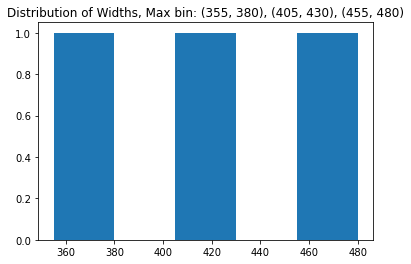

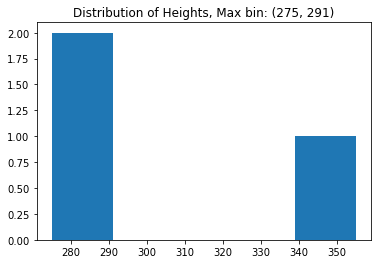

In [5]:
plot_all_distributions(PATH_TO_DATA_FOLDER)

## Resizing Image

In [6]:
def resize_all_images(PATH_TO_DATA_FOLDER, PATH_TO_RESIZED_FOLDER, STANDARD_WIDTH, STANDARD_HEIGHT):
    count = 0
    for file_name in os.listdir(PATH_TO_DATA_FOLDER):
        if(count % SHOW_PROGRESS_COUNT == 0):
            print("Finished " + str(count))
        count += 1
        image = Image.open(PATH_TO_DATA_FOLDER + "\\" + file_name).resize((STANDARD_WIDTH, STANDARD_HEIGHT))
        image.save(PATH_TO_RESIZED_FOLDER + "\\" + file_name)
    print("Finished all")

In [7]:
resize_all_images(PATH_TO_DATA_FOLDER, PATH_TO_RESIZED_FOLDER, STANDARD_WIDTH, STANDARD_HEIGHT)

Finished 0
Finished 10
Finished all


## Convert Color to Greyscale

In [8]:
def color_to_grayscale(PATH_TO_RESIZED_FOLDER, PATH_TO_GREYSCALE_FOLDER):
    count = 0
    for file_name in os.listdir(PATH_TO_RESIZED_FOLDER):
        if(count % SHOW_PROGRESS_COUNT == 0):
            print("Finished " + str(count))
        count += 1
        image = Image.open(PATH_TO_RESIZED_FOLDER + "\\" + file_name).convert('L')
        image.save(PATH_TO_GREYSCALE_FOLDER + "\\" + file_name)
    print("Finished all")

In [9]:
color_to_grayscale(PATH_TO_RESIZED_FOLDER, PATH_TO_GREYSCALE_FOLDER)

Finished 0
Finished 10
Finished all
